In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import re
import datetime

## Global vars

In [2]:
res = 0.1 # resolution of the environmental data

# spatial constraints
lat_max = 34.75
lat_min = 34.05
num_lats = int((lat_max - lat_min + res) / res)
lats = np.linspace(lat_max, lat_min, num=num_lats) # used later on to index a given fire point

lon_max = -117.5
lon_min = -119.0
num_lons = int((lon_max - lon_min + res) / res)
lons = np.linspace(lon_max, lon_min, num=num_lons) # used later on to index a given fire point

# temporal constraints
start_date = datetime.date(year=2025, month=1, day=1)
end_date = datetime.date(year=2025, month=1, day=31)
diff = end_date - start_date
day_increment = datetime.timedelta(days=1)

# base path to the data folder
folder = "../fire_data/noaa"

# used to clean the intial whitespace present in the data files
pattern = r', +'
whitespace = re.compile(pattern)

In [3]:
def clean_file(ymd: str):
    with open(f'{folder}/raw/hms_fire{ymd}.txt', 'r') as f:
        lines = f.readlines()
        lines = [whitespace.sub(",", line.strip()) for line in lines]
    
    with open(f'{folder}/raw/hms_fire{ymd}.txt', 'w') as f:
        for line in lines:
            f.write(line + "\n")

In [4]:
def filter_file(ymd):
    fire_data = pd.read_csv(f"{folder}/raw/hms_fire{ymd}.txt", delimiter=',')
    within_bounds = fire_data[(fire_data["Lat"] >= lat_min) &
                          (fire_data["Lat"] <= lat_max) & 
                          (fire_data["Lon"] >= lon_min) &
                          (fire_data["Lon"] <= lon_max)]
    within_bounds.to_csv(f"{folder}/clean/hms_fire{ymd}.csv", index=False)

Clean and filter each txt file

In [5]:
# for day in range(1, diff.days + 1):
#     curr = start_date + day_increment * day
#     ymd = str(curr).replace("-", "")
    # clean_file(ymd)
    # filter_file(ymd)

Merge all csvs into a single file

In [6]:
# all_data = pd.read_csv(f"{folder}/clean/hms_fire20250101.csv", delimiter=',')

# for day in range(1, diff.days + 1):
#     curr = start_date + day_increment * day
#     ymd = str(curr).replace("-", "")
#     fire_data = pd.read_csv(f"{folder}/clean/hms_fire{ymd}.csv", delimiter=',')
#     all_data = all_data.merge(fire_data, how='outer')

# all_data["Hour"] = (all_data["YearDay"] - 2025001) * 24 + (all_data['Time'] / 100).astype(int)
# all_data.sort_values(by="Hour", ascending=True, inplace=True)
# all_data.to_csv("../fire_data/noaa/all_data.csv", index=False)

In [7]:
all_data = pd.read_csv("../fire_data/noaa/all_data.csv", delimiter=',')

In [8]:
# all_data_filtered = all_data[all_data["Method"] != "ANALYSIS"]
# all_data_filtered.to_csv("../fire_data/noaa/all_data.csv", index=False)

In [9]:
# January 9, 2025
year_day = 2025009

time = 700 # 7:00 am

# get all fire events that happen within the hour of 7:00 am
filtered = all_data[(all_data['YearDay'] == year_day) & 
                    (all_data['Time'] >= time) & 
                    (all_data['Time'] < time + 100)]
filtered.sort_values(by="Time", ascending=True)

,Lon,Lat,YearDay,Time,Satellite,Method,Ecosystem,FRP,Hour,LatIdx,LonIdx
4558,-118.518463,34.068794,2025009,700,GOES-EAST,FDC,22,548.886,199,7,10
4564,-118.539093,34.094944,2025009,700,GOES-EAST,FDC,26,1921.971,199,7,10
4550,-118.576675,34.097412,2025009,700,GOES-EAST,FDC,22,443.430,199,7,11
4516,-118.518463,34.068798,2025009,701,GOES-EAST,FDC,22,535.853,199,7,10
4546,-118.539101,34.094944,2025009,701,GOES-EAST,FDC,26,1718.833,199,7,10
4527,-118.576675,34.097412,2025009,701,GOES-EAST,FDC,22,515.764,199,7,11
4515,-118.518463,34.068798,2025009,706,GOES-EAST,FDC,22,676.401,199,7,10
4528,-118.576675,34.097412,2025009,706,GOES-EAST,FDC,22,492.427,199,7,11
4543,-118.539101,34.094944,2025009,706,GOES-EAST,FDC,26,1548.982,199,7,10
4512,-118.576675,34.097412,2025009,710,GOES-EAST,FDC,22,568.583,199,7,11


In [10]:
len(filtered['Time'].unique())

18

In [11]:
filtered.groupby(["Lat", "Lon"]).groups

{(34.068794, -118.518463): [4529, 4531, 4540, 4557, 4558, 4565], (34.068798, -118.518463): [4515, 4516, 4517, 4518, 4519, 4532, 4533, 4534, 4535, 4536, 4537, 4538], (34.079021, -118.66959): [4551], (34.079021, -118.669586): [4547, 4549, 4552, 4553, 4554], (34.094944, -118.539101): [4530, 4539, 4541, 4543, 4544, 4545, 4546, 4548, 4561, 4562, 4569, 4571], (34.094944, -118.539093): [4555, 4563, 4564, 4566, 4567, 4568], (34.097412, -118.576675): [4512, 4513, 4514, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4542, 4550, 4556, 4559, 4560, 4570]}

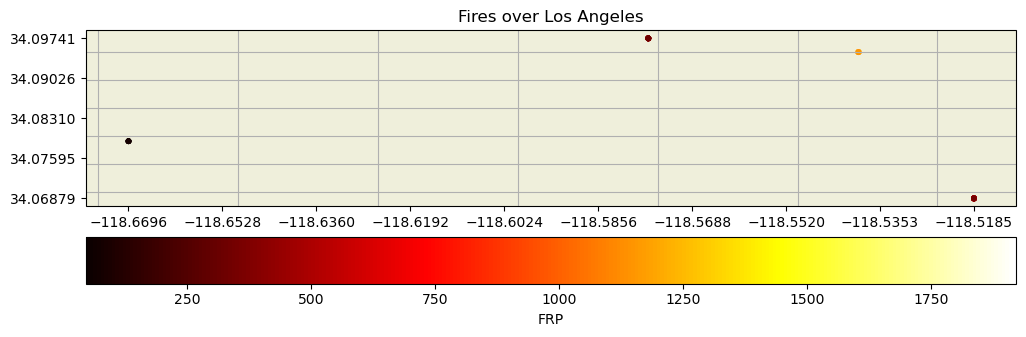

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a plot with a world map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()

# Plot the points
scatter = ax.scatter(filtered["Lon"], filtered["Lat"], c=filtered["FRP"],
                     cmap='hot', s=10, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.05)
cbar.set_label('FRP')

# Set the title
ax.set_title('Fires over Los Angeles')

ax.set_xticks(np.linspace(filtered['Lon'].min(), filtered['Lon'].max(), num=10))
ax.set_yticks(np.linspace(filtered['Lat'].min(), filtered['Lat'].max(), num=5))

# Show the plot
plt.show()

In [13]:
def get_lat_idx(lat: float):
    return np.abs(lats - lat).argmin()

def get_lon_idx(lon: float):
    return np.abs(lons - lon).argmin()

In [14]:
print(lats)
get_lat_idx(34.068794)

[34.75 34.65 34.55 34.45 34.35 34.25 34.15 34.05]


np.int64(7)

In [15]:
# all_data['LatIdx'] = all_data['Lat'].apply(get_lat_idx)
# all_data['LonIdx'] = all_data['Lon'].apply(get_lon_idx)
all_data

,Lon,Lat,YearDay,Time,Satellite,Method,Ecosystem,FRP,Hour,LatIdx,LonIdx
0,-118.55836,34.054752,2025007,1945,NOAA 20,VIIRS,1,120.404,163,7,11
1,-118.56017,34.056534,2025007,1945,NOAA 20,VIIRS,1,35.968,163,7,11
2,-118.55786,34.056011,2025007,2038,NOAA 21,VIIRS,1,250.826,164,7,11
3,-118.55715,34.052338,2025007,2038,NOAA 21,VIIRS,1,250.826,164,7,11
4,-118.53287,34.064571,2025007,2038,NOAA 21,VIIRS,22,362.110,164,7,10
...,...,...,...,...,...,...,...,...,...,...,...
11355,-118.61203,34.568436,2025023,2104,SUOMI NPP,VIIRS,46,3.343,549,2,11
11356,-118.09415,34.232578,2025024,858,NOAA 21,VIIRS,22,1.850,560,5,6
11357,-118.09554,34.235069,2025024,923,SUOMI NPP,VIIRS,22,0.825,561,5,6
11358,-118.09655,34.231506,2025024,923,SUOMI NPP,VIIRS,22,0.640,561,5,6


In [17]:
# create 3d array of proper shape to insert into netcdf
frp = np.zeros(shape=(744, 8, 16))
for index, row in all_data.iterrows():
    hour_idx = row["Hour"]
    lat_idx = row["LatIdx"]
    lon_idx = row["LonIdx"]
    frp[hour_idx][lat_idx][lon_idx] += max(0, row['FRP']) # just take the max FRP for now

In [18]:
frp.dtype

dtype('float64')

In [19]:
from netCDF4 import Dataset

# https://www.ospo.noaa.gov/products/land/hms.html#about
with Dataset("../combined_data/jan2025.nc", 'a') as env_data:
    # frp_var = env_data.createVariable("frp", 'float32', ('valid_time', 'latitude', 'longitude'))
    frp_var = env_data.variables['frp']
    frp_var[:] = frp
    frp_var.units = "MW" # megawatts
    frp_var.long_name = "Fire Radiative Power"